In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

y_train = y_train == 0

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="sgd", loss="binary_crossentropy")

In [4]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2806
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1890
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1640
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1492
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1386
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.1346
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.1250A: 0s - loss: 0.124
Epoch 8/10
60/60 [==============================] - 0s 2ms/step - loss: 0.1216
Epoch 9/10
60/60 [==============================] - 0s 2ms/step - loss: 0.1203
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1197


In [6]:
print(y_train[1])

True


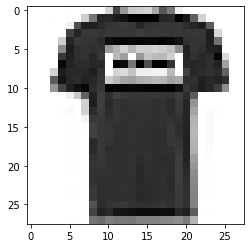

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap="gray_r")
plt.show()

In [8]:
X_train[0].reshape(1, 784).shape

(1, 784)

In [9]:
model.predict(X_train[1].reshape(1, 784))

array([[0.8409216]], dtype=float32)

In [10]:
y_train_pred = model.predict(X_train.reshape(60000, 784))

In [11]:
import numpy as np

np.round(y_train_pred).reshape(-1)

array([0., 1., 0., ..., 0., 1., 0.], dtype=float32)

In [12]:
y_train

array([False,  True,  True, ..., False,  True, False])

In [15]:
np.mean(np.round(y_train_pred).reshape(-1) == y_train)

0.9545166666666667